In [27]:
import tensorflow as tf
import keras
from keras.datasets import mnist

In [28]:
# Load the data and seperate it into the trainning and testing section
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# This is the data (x)
print('Number of train examples:', x_train.shape)
print('Number of test examples:', x_test.shape)

# these represent the ouput for the data (y)
print('Number of train features:', y_train.shape)
print('Number of test features:', y_test.shape)


# The reason we have the data broken up into two sections is to update the model (train)
# and then see how well it preforms with new information (testing)

Number of train examples: (60000, 28, 28)
Number of test examples: (10000, 28, 28)
Number of train features: (60000,)
Number of test features: (10000,)


In [29]:

# Get the number of pixels in the Neural Network
image_size = 784

# Reduce the dimensionality of the data
x_train = x_train.reshape(x_train.shape[0], image_size) # Transform from matrix to vector
x_train = x_train.astype('float32')
x_train /= 255 # Normalize inputs from 0-255 to 0.0-1.0

x_test = x_test.reshape(x_test.shape[0], image_size) # Transform from matrix to vector
x_test = x_test.astype('float32')
x_test /= 255 # Normalize inputs from 0-255 to 0.0-1.0



# Convert class vectors to binary class matrices
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


print('Number of train examples:', x_train.shape)
print('Number of test examples:', x_test.shape)
print('Number of train features:', y_train.shape)
print('Number of test features:', y_test.shape)

Number of train examples: (60000, 784)
Number of test examples: (10000, 784)
Number of train features: (60000, 10)
Number of test features: (10000, 10)


In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.vis_utils import plot_model

In [31]:
# sequential is a type of feed forward model
model = Sequential(
            [
                # fully connected layer with 32 nodes, takes in 28*28 input images
                Dense(32, input_shape=(28*28,), activation='linear'),
                # another fully connected layer with 5 nodes
                Dense(5, activation='linear'),
                # another fully connected layer with 5 nodes
                Dense(10, activation='linear')
            ]
                  )

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 165       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                60        
Total params: 25,345
Trainable params: 25,345
Non-trainable params: 0
_________________________________________________________________


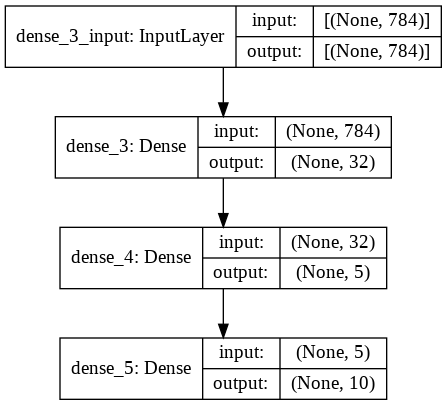

In [33]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [34]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, epochs=5, verbose=True, validation_split=.1)

Epoch 1/5
211/211 [==============================] - 5s 5ms/step - loss: 5.6438 - accuracy: 0.0884 - val_loss: 7.9551 - val_accuracy: 0.1462
Epoch 2/5
211/211 [==============================] - 1s 3ms/step - loss: 8.0770 - accuracy: 0.1390 - val_loss: 8.4137 - val_accuracy: 0.1802
Epoch 3/5
211/211 [==============================] - 1s 3ms/step - loss: 8.1571 - accuracy: 0.1766 - val_loss: 7.4271 - val_accuracy: 0.1547
Epoch 4/5
211/211 [==============================] - 1s 3ms/step - loss: 8.1128 - accuracy: 0.1667 - val_loss: 6.9977 - val_accuracy: 0.1088
Epoch 5/5
211/211 [==============================] - 1s 3ms/step - loss: 7.2280 - accuracy: 0.1208 - val_loss: 9.8561 - val_accuracy: 0.1240


In [35]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('relu'))

In [36]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, epochs=10, verbose=True, validation_split=.1)

Epoch 1/10
211/211 [==============================] - 9s 37ms/step - loss: 5.6531 - accuracy: 0.1957 - val_loss: 7.6438 - val_accuracy: 0.0960
Epoch 2/10
211/211 [==============================] - 8s 36ms/step - loss: 7.6462 - accuracy: 0.1000 - val_loss: 7.5537 - val_accuracy: 0.0960
Epoch 3/10
211/211 [==============================] - 7s 35ms/step - loss: 7.4995 - accuracy: 0.1014 - val_loss: 7.5171 - val_accuracy: 0.0960
Epoch 4/10
211/211 [==============================] - 7s 35ms/step - loss: 7.5161 - accuracy: 0.0997 - val_loss: 7.4965 - val_accuracy: 0.0960
Epoch 5/10
211/211 [==============================] - 7s 35ms/step - loss: 7.5464 - accuracy: 0.1004 - val_loss: 7.4837 - val_accuracy: 0.0960
Epoch 6/10
211/211 [==============================] - 7s 35ms/step - loss: 7.5377 - accuracy: 0.0984 - val_loss: 7.4757 - val_accuracy: 0.0960
Epoch 7/10
211/211 [==============================] - 7s 35ms/step - loss: 7.5594 - accuracy: 0.0997 - val_loss: 7.4707 - val_accuracy: 0.0960